In [1]:
import pandas as pd
import os, gc
import numpy as np
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

In [2]:
df = pd.read_parquet('train_data.parquet')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643680 entries, 0 to 1643679
Columns: 419 entries, sequence_id to reactivity_error_0206
dtypes: float32(413), int64(2), object(4)
memory usage: 2.6+ GB


In [4]:
df.describe()

,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,reactivity_0004,reactivity_0005,reactivity_0006,reactivity_0007,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
count,1.643680e+06,1.643680e+06,1.643680e+06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,2.230474e+03,1.194395e+00,2.666206e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.415467e+04,2.696973e+00,4.421925e-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,0.000000e+00,-1.672000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.200000e+01,1.090000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.480000e+02,3.830000e-01,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,5.260000e+02,1.081000e+00,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.474813e+07,2.563710e+02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.head()

,sequence_id,sequence,experiment_type,dataset_name,reads,signal_to_noise,SN_filter,reactivity_0001,reactivity_0002,reactivity_0003,...,reactivity_error_0197,reactivity_error_0198,reactivity_error_0199,reactivity_error_0200,reactivity_error_0201,reactivity_error_0202,reactivity_error_0203,reactivity_error_0204,reactivity_error_0205,reactivity_error_0206
0,8cdfeef009ea,GGGAACGACUCGAGUAGAGUCGAAAAACGUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,2343,0.944,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,51e61fbde94d,GGGAACGACUCGAGUAGAGUCGAAAAACAUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,5326,1.933,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,25ce8d5109cd,GGGAACGACUCGAGUAGAGUCGAAAAACCUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,4647,2.347,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,07dcfb6d1965,GGGAACGACUCGAGUAGAGUCGAAAAACUUUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,102843,11.824,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,e561cc042a4c,GGGAACGACUCGAGUAGAGUCGAAAAACGAUGAUAUGGAUUUACUC...,2A3_MaP,15k_2A3,7665,3.519,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.isnull().sum()

sequence_id                    0
sequence                       0
experiment_type                0
dataset_name                   0
reads                          0
                          ...   
reactivity_error_0202    1643680
reactivity_error_0203    1643680
reactivity_error_0204    1643680
reactivity_error_0205    1643680
reactivity_error_0206    1643680
Length: 419, dtype: int64

In [7]:
df['sequenceLength'] = df['sequence'].str.len()

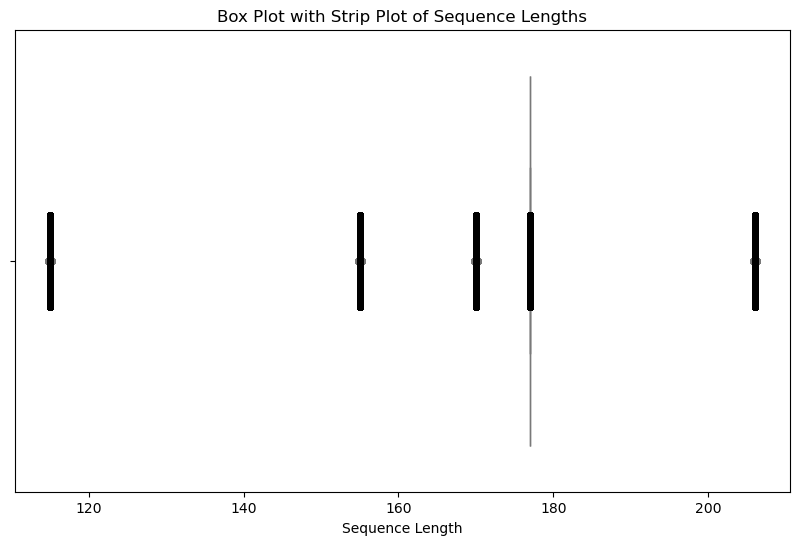

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['sequenceLength'], color='lightblue')
sns.stripplot(x=df['sequenceLength'], color='black', alpha=0.5)
plt.title('Box Plot with Strip Plot of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.show()

In [9]:
def print_unique_sequence_lengths(df, sequence_column):
    sequence_lengths = df[sequence_column].str.len()
    unique_lengths = sequence_lengths.value_counts()
    print("Unique Sequence Lengths and their Counts:")
    print(unique_lengths)
    
print_unique_sequence_lengths(df, 'sequence')

Unique Sequence Lengths and their Counts:
177    1568354
170      30000
115      27290
155      13038
206       4998
Name: sequence, dtype: int64


### Our positional embedding experiments used the sequences of length 115 as training data and those of length 206 as validation, to test the model's ability to generalize to longer sequences

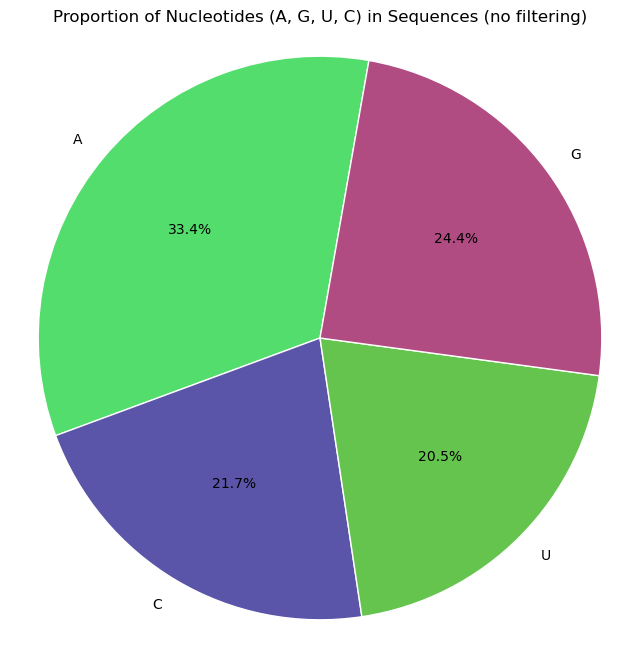

In [36]:
nucleotide_counts = {'A': 0, 'C': 0, 'U': 0, 'G': 0}
for seq in df['sequence']:
    for nucleotide in nucleotide_counts.keys():
        nucleotide_counts[nucleotide] += seq.count(nucleotide)

ordered_labels = ['A', 'C', 'U', 'G']
ordered_sizes = [nucleotide_counts[n] for n in ordered_labels]
colors = ['#52DD6C', '#5A55A8', '#65C44E', '#B04C82']

plt.figure(figsize=(8, 8))
plt.pie(ordered_sizes, labels=ordered_labels, colors=colors, autopct='%1.1f%%', startangle=80, wedgeprops=dict(edgecolor='white'))
plt.axis('equal')
plt.title('Proportion of Nucleotides (A, G, U, C) in Sequences (no filtering)')
plt.show()

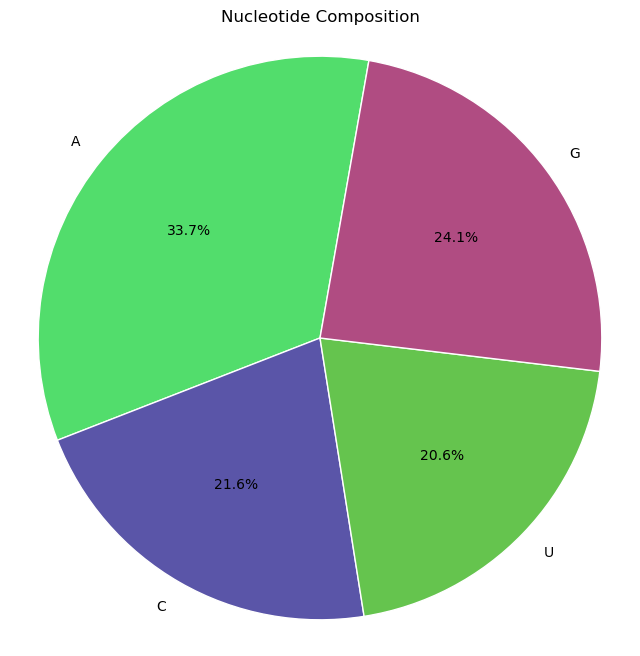

In [37]:
filtered_df = df[df['SN_filter'] == 1]

nucleotide_counts = {'A': 0, 'C': 0, 'U': 0, 'G': 0}
for seq in filtered_df['sequence']:
    for nucleotide in nucleotide_counts.keys():
        nucleotide_counts[nucleotide] += seq.count(nucleotide)

ordered_labels = ['A', 'C', 'U', 'G']
ordered_sizes = [nucleotide_counts[n] for n in ordered_labels]
colors = ['#52DD6C', '#5A55A8', '#65C44E', '#B04C82']

plt.figure(figsize=(8, 8))
plt.pie(ordered_sizes, labels=ordered_labels, colors=colors, autopct='%1.1f%%', startangle=80, wedgeprops=dict(edgecolor='white'))
plt.axis('equal')  
plt.title('Nucleotide Composition')
plt.show()

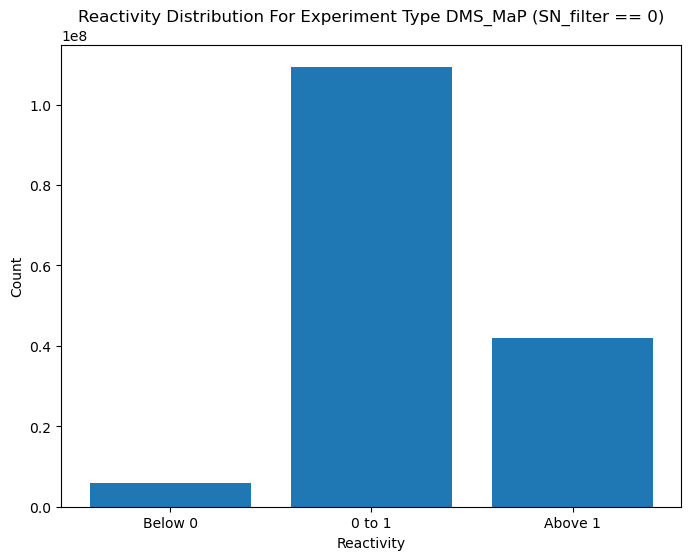

In [48]:
row_DMS = df[df['experiment_type'] == 'DMS_MaP']

# Select only reactivity columns
all_reactivities = row_DMS.filter(regex='^reactivity_').values.flatten()

# Categorize reactivities
below_zero = (all_reactivities < 0).sum()
between_zero_and_one = ((all_reactivities >= 0) & (all_reactivities <= 1)).sum()
above_one = (all_reactivities > 1).sum()

# Data for plotting
categories = ['Below 0', '0 to 1', 'Above 1']
counts = [below_zero, between_zero_and_one, above_one]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts)
plt.title('Reactivity Distribution For Experiment Type DMS_MaP (SN_filter == 0)')
plt.xlabel('Reactivity')
plt.ylabel('Count')
plt.show()

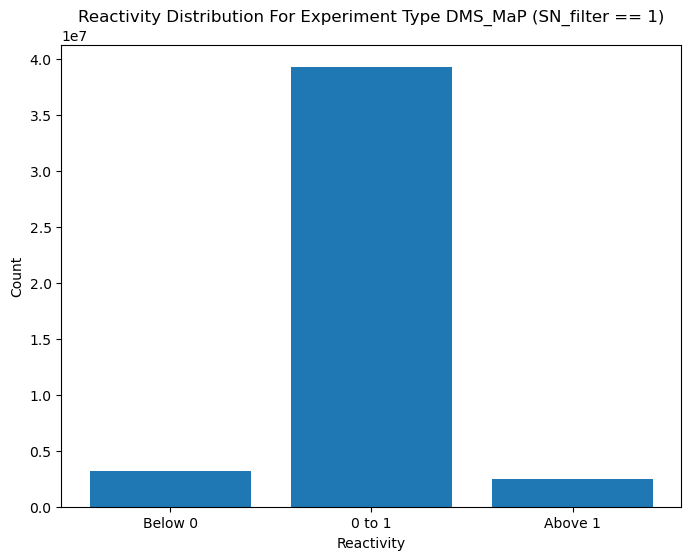

In [49]:
# Filter DataFrame where 'SN_filter' equals 1
filtered_df = df[df['SN_filter'] == 1]

rows_DMS = filtered_df[filtered_df['experiment_type'] == 'DMS_MaP']

all_reactivities = rows_DMS.filter(regex='^reactivity_').values.flatten()

# Categorize reactivities
below_zero = (all_reactivities < 0).sum()
between_zero_and_one = ((all_reactivities >= 0) & (all_reactivities <= 1)).sum()
above_one = (all_reactivities > 1).sum()

# Data for plotting
categories = ['Below 0', '0 to 1', 'Above 1']
counts = [below_zero, between_zero_and_one, above_one]

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(categories, counts)
plt.title('Reactivity Distribution For Experiment Type DMS_MaP (SN_filter == 1)')
plt.xlabel('Reactivity')
plt.ylabel('Count')
plt.show()

### Reactivities below 0 and above 1 are clipped in our training. However this implementation is not ideal, as it reduces the data given to the model